<a href="https://colab.research.google.com/github/jahnavinssdasari/Machine-Learning-Projects/blob/main/prblm3_wholesale_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Wrangling
import pandas as pd
import numpy as np

In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Clustering
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [ ]:
data_path = r'Wholesale customers data.csv'
data = pd.read_csv(data_path)

In [ ]:
# Display the first few rows
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# General information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [ ]:
# Summary statistics
print(data.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

### Data Cleaning - Handling missing values and removed unnecessary columns.

In [ ]:
# Checking for missing values
missing_values=(data.isnull().sum())
print(f"Missing values per column:\n{missing_values}")

Missing values per column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [ ]:
 df_cleaned = data.dropna()
print("Missing values after treatment: \n", df_cleaned.isnull().sum())

Missing values after treatment: 
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [ ]:
df_cleaned = df_cleaned.drop_duplicates()
print(f"Remaining data after duplicate removal: {df_cleaned.shape[0]} rows")

Remaining data after duplicate removal: 440 rows


In [ ]:
df_cleaned = df_cleaned.loc[:, df_cleaned.nunique() > 1]
print("Remaining data after removing zero-variance columns: \n", df_cleaned.columns)

Remaining data after removing zero-variance columns: 
 Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


### Treatment for outliners

In [ ]:
import pandas as pd
import numpy as np
# Select only numeric columns for outlier detection and clustering
numeric_df = data.select_dtypes(include=[np.number])
# Removing potential outliers using IQR method
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
# Filter out outliers
df_no_outliers = numeric_df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Number of rows after outlier removal: {df_no_outliers.shape[0]}")

Number of rows after outlier removal: 332


### Label Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
df_cleaned = data.dropna()
# Assuming 'Channel' and 'Region' are categorical columns
categorical_columns = ['Channel', 'Region']

le = LabelEncoder()
for col in categorical_columns:
    df_cleaned[col + '_encoded'] = le.fit_transform(df_cleaned[col].astype(str))

# Drop original categorical columns after encoding
df_cleaned = df_cleaned.drop(columns=categorical_columns)

In [ ]:
# Standardize the selected features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

## Clustering:
### Here, we will user K-Means clustering to analyze customer segments based on features such as 'Fresh' , 'Milk'

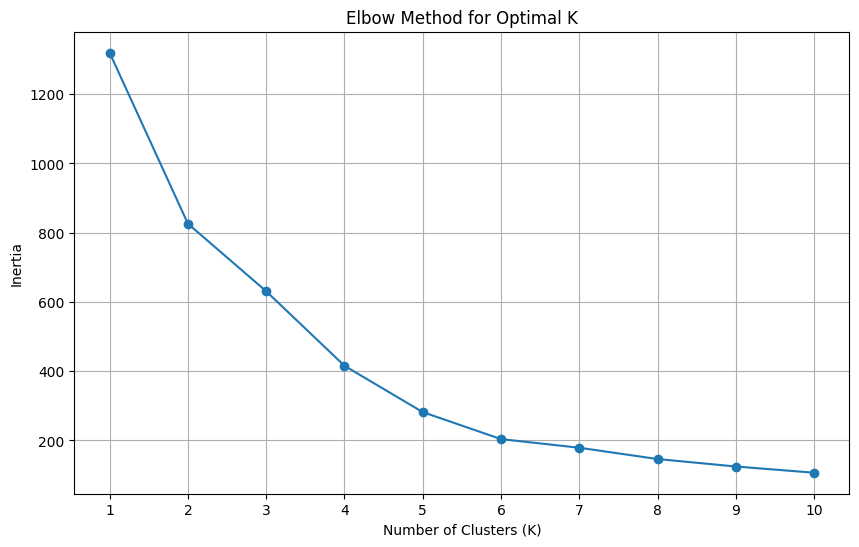

In [ ]:

# Elbow Method to determine the optimal number of clusters
inertia = []
k_values = range(1, 11)  # Testing for cluster sizes from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

Silhouette Score for n_clusters=4: 0.5411151702654212
Calinski-Harabasz Score for n_clusters=4: 316.32846706500135


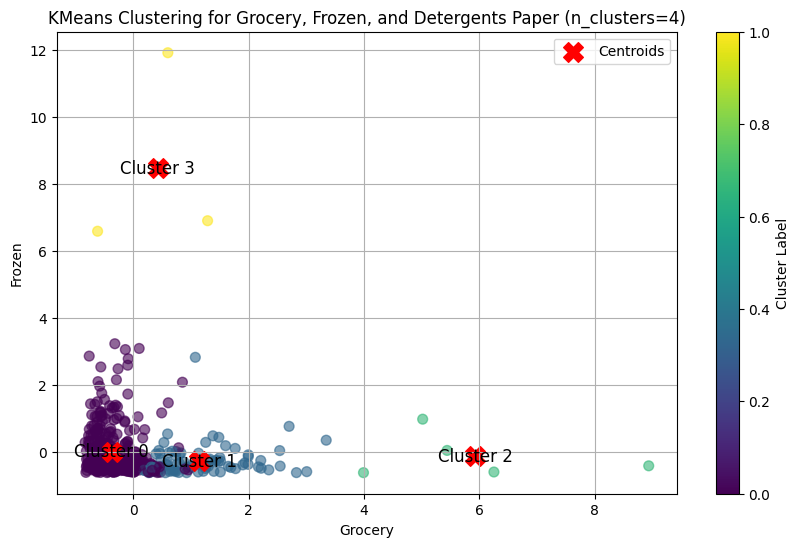

In [ ]:
# Keeping only the 'Grocery', 'Frozen', and 'Detergents_Paper' columns
df_selected = df_cleaned[['Grocery', 'Frozen', 'Detergents_Paper']]
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_cleaned['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate the silhouette score for n_clusters = 4
silhouette_avg = silhouette_score(scaled_data, df_cleaned['KMeans_Cluster'])
print(f"Silhouette Score for n_clusters={n_clusters}: {silhouette_avg}")

# Calculate the Calinski-Harabasz score
calinski_harabasz_avg = calinski_harabasz_score(scaled_data, df_cleaned['KMeans_Cluster'])
print(f'Calinski-Harabasz Score for n_clusters={n_clusters}: {calinski_harabasz_avg}')

# Visualize Clusters using the first two features ('Grocery', 'Frozen')
plt.figure(figsize=(10, 6))
scatter = plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)

# Calculate centroids for the clusters
centroids = kmeans.cluster_centers_

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# Add cluster labels to centroids
for i in range(centroids.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], f'Cluster {i}', fontsize=12, ha='center', va='center', color='black')

# Visualizing the Clusters
plt.title('KMeans Clustering for Grocery, Frozen, and Detergents Paper (n_clusters=4)')
plt.xlabel('Grocery')
plt.ylabel('Frozen')

# Add color bar
plt.colorbar(label='Cluster Label')

# Add legend for centroids
plt.legend()
plt.grid()
plt.show()

### Silhouette Score: 0.54
### Calinski-Harabasz Score: 316.3

### Aggregate mean of each cluster

In [ ]:
# Calculate the mean characteristics of each cluster
numeric_df_cleaned = df_cleaned.select_dtypes(include=[np.number])
cluster_means = numeric_df_cleaned.groupby('KMeans_Cluster').mean()

# Display the mean values of each cluster
print("Aggregate Mean of Each Cluster:")
print(cluster_means)

Aggregate Mean of Each Cluster:
                       Fresh          Milk       Grocery        Frozen  \
KMeans_Cluster                                                           
0               12807.953623   3624.150725   4376.124638   3060.257971   
1                7762.459770  12315.367816  18757.080460   1738.160920   
2               21035.000000  32952.800000  64215.000000   2445.800000   
3               26959.333333  21274.666667  11952.666667  44137.333333   

                Detergents_Paper    Delicassen  Channel_encoded  \
KMeans_Cluster                                                    
0                    1072.942029   1241.794203         0.162319   
1                    8529.632184   1979.425287         0.931034   
2                   30806.400000   2812.800000         1.000000   
3                     527.333333  18750.000000         0.000000   

                Region_encoded  
KMeans_Cluster                  
0                     1.533333  
1                    

In [ ]:
# Average of each cluster
cluster_averages = numeric_df_cleaned.groupby('KMeans_Cluster').mean()

print("Average Values of Each Cluster:")
print(cluster_averages)

Average Values of Each Cluster:
                       Fresh          Milk       Grocery        Frozen  \
KMeans_Cluster                                                           
0               12807.953623   3624.150725   4376.124638   3060.257971   
1                7762.459770  12315.367816  18757.080460   1738.160920   
2               21035.000000  32952.800000  64215.000000   2445.800000   
3               26959.333333  21274.666667  11952.666667  44137.333333   

                Detergents_Paper    Delicassen  Channel_encoded  \
KMeans_Cluster                                                    
0                    1072.942029   1241.794203         0.162319   
1                    8529.632184   1979.425287         0.931034   
2                   30806.400000   2812.800000         1.000000   
3                     527.333333  18750.000000         0.000000   

                Region_encoded  
KMeans_Cluster                  
0                     1.533333  
1                    

In [ ]:
#creating a csv file
df_cleaned['Cluster'] = clusters

df_cleaned.to_csv("telechurnn.csv", encoding="utf-8", index=False)

import os
os.getcwd()

'/content'

In [ ]:
# Export the cleaned dataframe with cluster labels to a CSV
df_cleaned.to_csv("wholesale_customers_clusters.csv", encoding="utf-8", index=False)

# Tabulating the results
data = [
    [1, "K-Means clustering", silhouette_avg, calinski_harabasz_avg]
]
headers = ["S.No", "Clustering Model", "Silhouette Score", "Calinski Harabasz Score"]

table = tabulate(data, headers=headers, tablefmt="pretty")

print(table)

+------+--------------------+--------------------+-------------------------+
| S.No |  Clustering Model  |  Silhouette Score  | Calinski Harabasz Score |
+------+--------------------+--------------------+-------------------------+
|  1   | K-Means clustering | 0.5411151702654212 |   316.32846706500135    |
+------+--------------------+--------------------+-------------------------+
